In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
#read dataset
comments=pd.read_csv('/content/GBcomments 2.csv')

In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19726 entries, 0 to 19727
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      19726 non-null  object 
 1   comment_text  19726 non-null  object 
 2   likes         19726 non-null  float64
 3   replies       19726 non-null  float64
 4   polarity      19726 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.4+ MB


<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>Sentiment analysis on YouTube Comments</strong></p>

* !pip install textblob
* Understanding Polarity in Natural Language Processing (NLP)
* https://www.lexalytics.com/lexablog/understanding-polarity

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [ ]:
comments.isna().sum()

video_id        0
comment_text    3
likes           1
replies         1
dtype: int64

In [ ]:
comments.dropna(inplace=True)

In [ ]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
comments['polarity']=polarity

In [ ]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0.0,0.0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0.0,0.0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0.0,0.0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0.0,0.0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0.0,0.0,0.500000


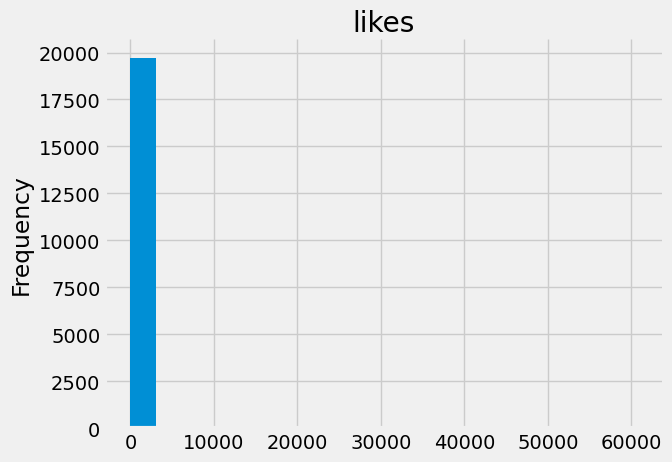

In [ ]:
# @title likes

from matplotlib import pyplot as plt
comments['likes'].plot(kind='hist', bins=20, title='likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

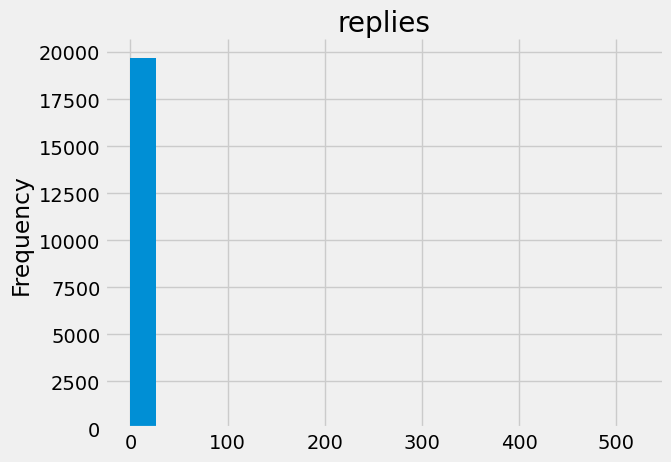

In [ ]:
# @title replies

from matplotlib import pyplot as plt
comments['replies'].plot(kind='hist', bins=20, title='replies')
plt.gca().spines[['top', 'right',]].set_visible(False)

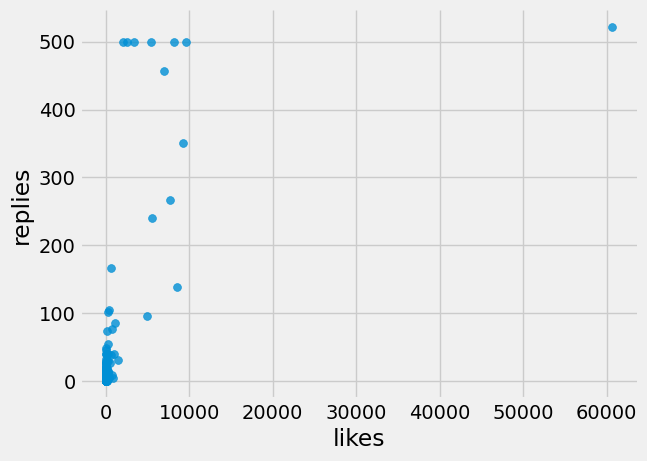

In [ ]:
# @title likes vs replies

from matplotlib import pyplot as plt
comments.plot(kind='scatter', x='likes', y='replies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

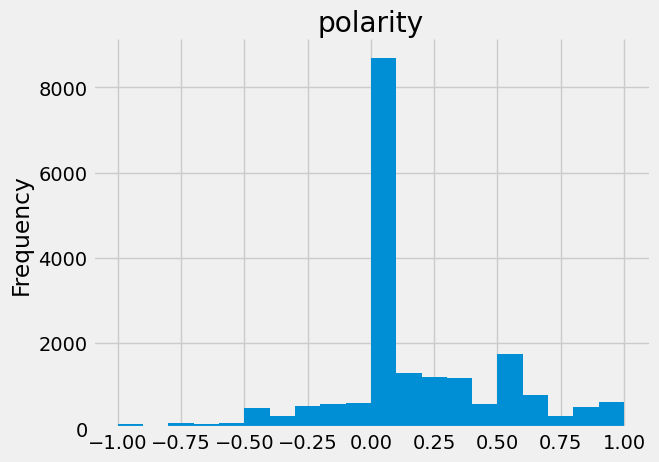

In [ ]:
# @title polarity

from matplotlib import pyplot as plt
comments['polarity'].plot(kind='hist', bins=20, title='polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

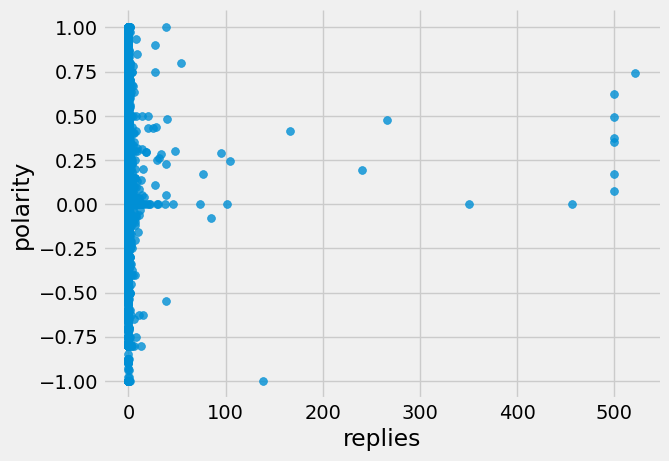

In [ ]:
# @title replies vs polarity

from matplotlib import pyplot as plt
comments.plot(kind='scatter', x='replies', y='polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='video_id', ylabel='likes'>

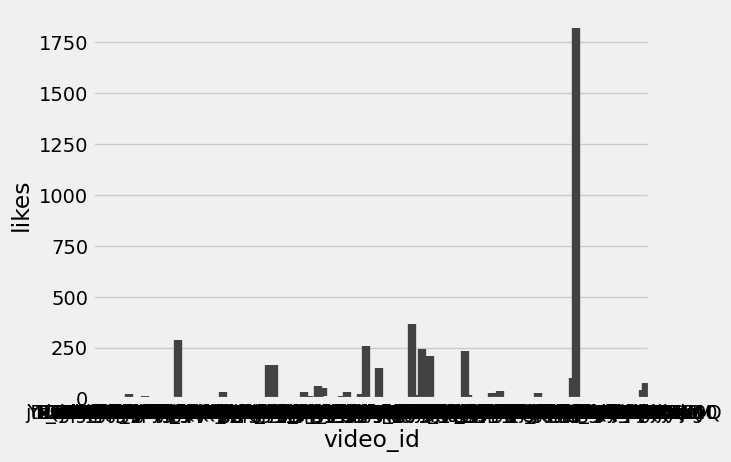

In [ ]:
# @title Average likes per video

sns.barplot(x='video_id', y='likes', data=comments)

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>EDA for the positive sentences</strong></p>


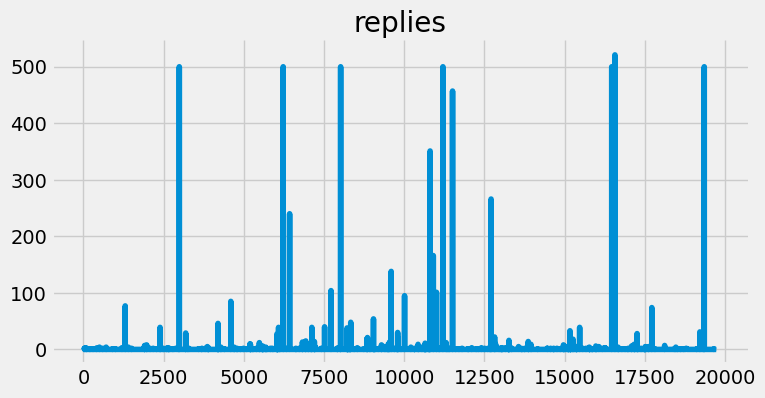

In [ ]:
# @title replies

from matplotlib import pyplot as plt
comments['replies'].plot(kind='line', figsize=(8, 4), title='replies')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
comments_positive=comments[comments['polarity']==1]

In [ ]:
comments_positive.shape

(542, 5)

In [ ]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0.0,2.0,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0.0,1.0,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0.0,0.0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0.0,0.0,1.0


<Axes: xlabel='video_id', ylabel='comment_text'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **k

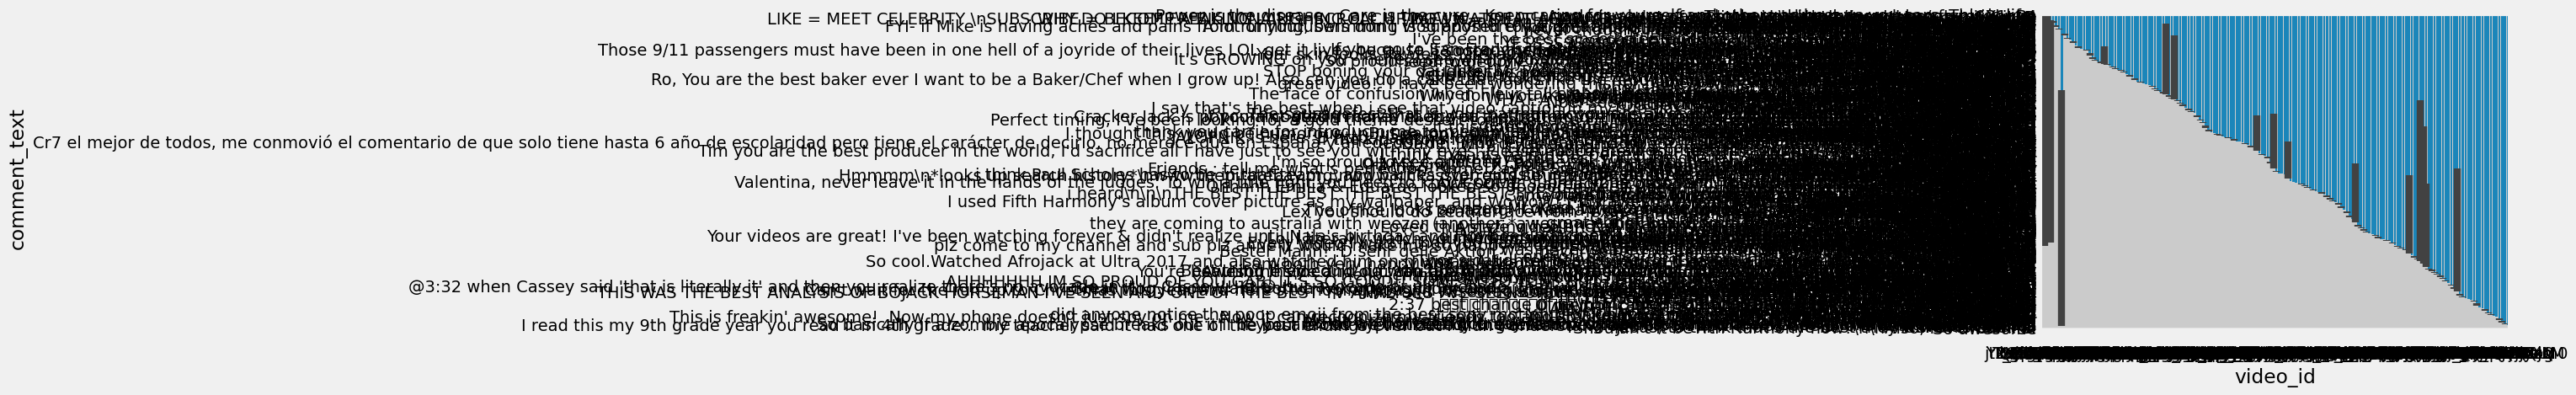

In [ ]:
# @title Number of comments per video

sns.barplot(x = 'video_id', y = 'comment_text', data = comments_positive)

* !pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)

In [ ]:
total_comments=' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

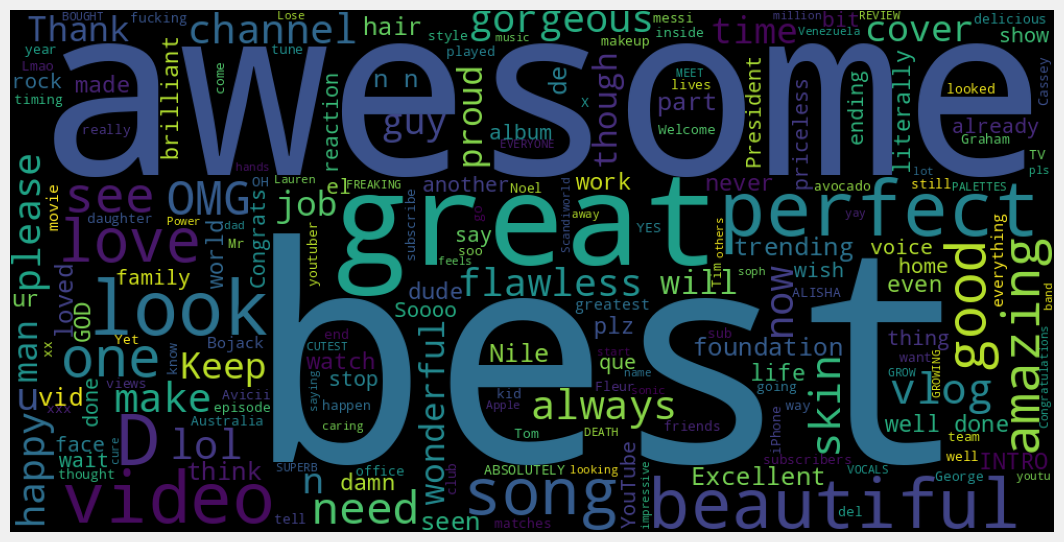

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>EDA for the negative sentences</strong></p>


In [ ]:
comments_negative=comments[comments['polarity']==-1]

In [ ]:
comments_negative.shape

(89, 5)

In [ ]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0.0,0.0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1.0,1.0,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0.0,0.0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1.0,0.0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0.0,0.0,-1.0


In [ ]:
total_comments=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

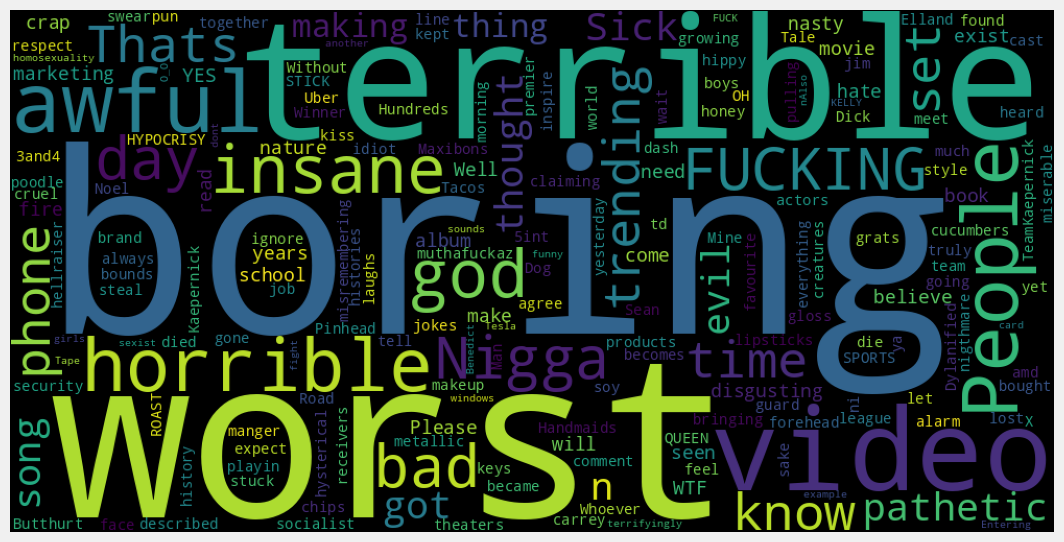

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>Analysing Tags column,what are trending tags on youtube</strong></p>


In [ ]:
#read dataset
videos=pd.read_csv('/content/GBcomments 2.csv')

In [ ]:
videos.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0


In [ ]:
import re

(-0.5, 999.5, 499.5, -0.5)

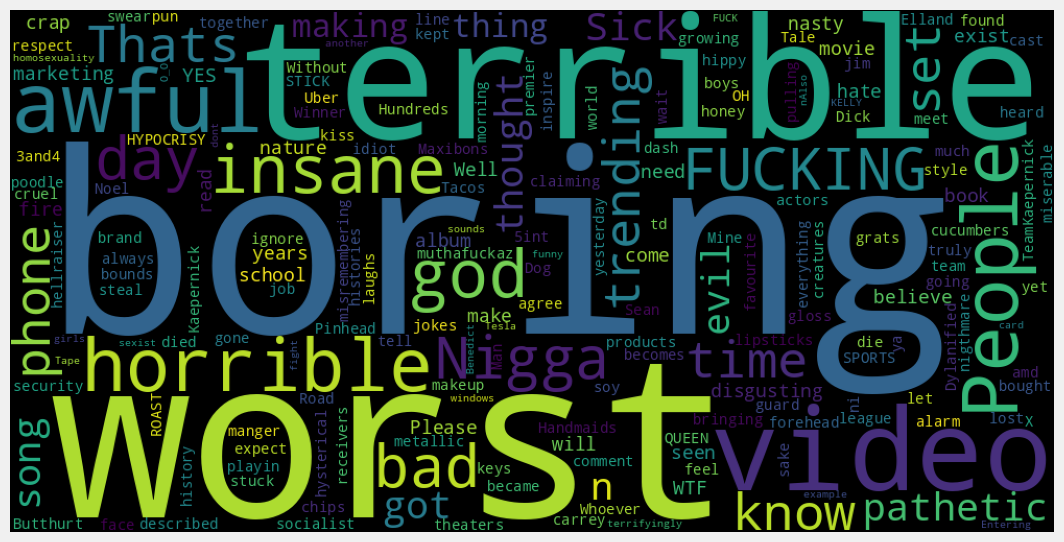

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>Relation among continuous variables</strong></p>

Text(0.5, 1.0, 'Regression plot for views & likes')

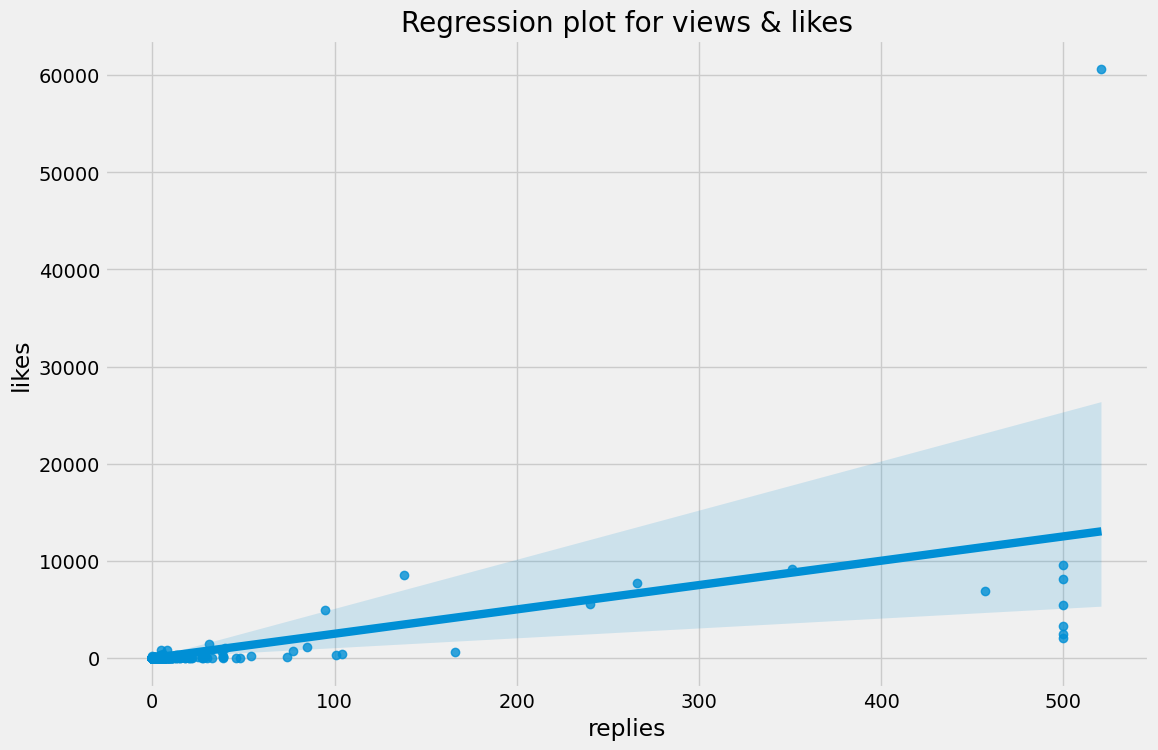

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=videos,x='replies',y='likes')
plt.title('Regression plot for views & likes')

* As quite obvious the number of likes have very strong relation with views

## Dislikes vs views Analysis

## Correlation matrix is the evidence of above analysis

In [ ]:
df_corr=videos[['comment_text','likes','video_id']]

In [ ]:
sns.heatmap(df_corr.corr(),center = True , annot=True,cmap="RdYlBu")

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FF4500; border-radius: 5px 5px;"><strong>Analyse Emojis in comments</strong></p>


In [ ]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0,1.00


In [ ]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

* !pip install emoji

In [ ]:
len(comments)

19726

In [ ]:
len(str)

In [ ]:
str

''

### create a dictionary of having each emoji with its frequency as well

In [ ]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [ ]:
result

{}

### sort the emojis according to its count or frequency

In [ ]:
result.items()

dict_items([])

In [ ]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [ ]:
final

{}

In [ ]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [ ]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

<center><p style="color:black;font-size:17px;border:2px solid blue;border-radius:12px 10px;text-align:center;"><b>Highly appreciate your questions or feedback related to this notebook.If you liked this Notebook, please do <span style="color:red;">upvote</span>.  </b> </p></center>